# Deep Neural Network for MNIST Classification



## CNN, or ConvNet
#### In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of artificial neural 

#### network, most commonly applied to analyze visual imagery.

- python -m pip install --upgrade `pip`

- pip install `tensorflow-datasets` or conda install `tensorflow-datasets`

- pip install `ipywidgets`

- *ipywidgets, also known as jupyter-widgets or simply widgets
  are interactive HTML widgets for Jupyter notebooks and the IPython kernel.*

- If you live in **IRAN**, before running the DATA cell, you should activate your VPN.

## Import the relevant packages

In [1]:
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

## Data



In [2]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

In [3]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\Amin\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [4]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

In [6]:
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples

6000.0

In [7]:
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

In [8]:
num_test_samples = mnist_info.splits['test'].num_examples

In [9]:
num_test_samples = tf.cast(num_test_samples, tf.int64)

In [10]:
def scale(image, label):
    
    image = tf.cast(image, tf.float32)
    image /= 255. 
    return image, label

In [11]:
scaled_train_and_validation_data = mnist_train.map(scale)

In [12]:
test_data = mnist_test.map(scale)

In [13]:
BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

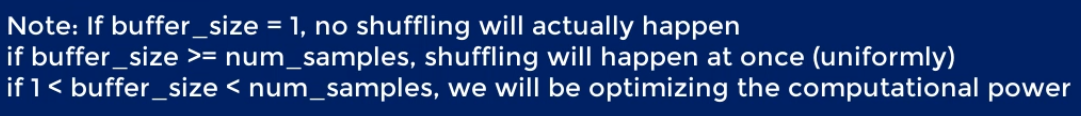

In [14]:
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)

In [15]:
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

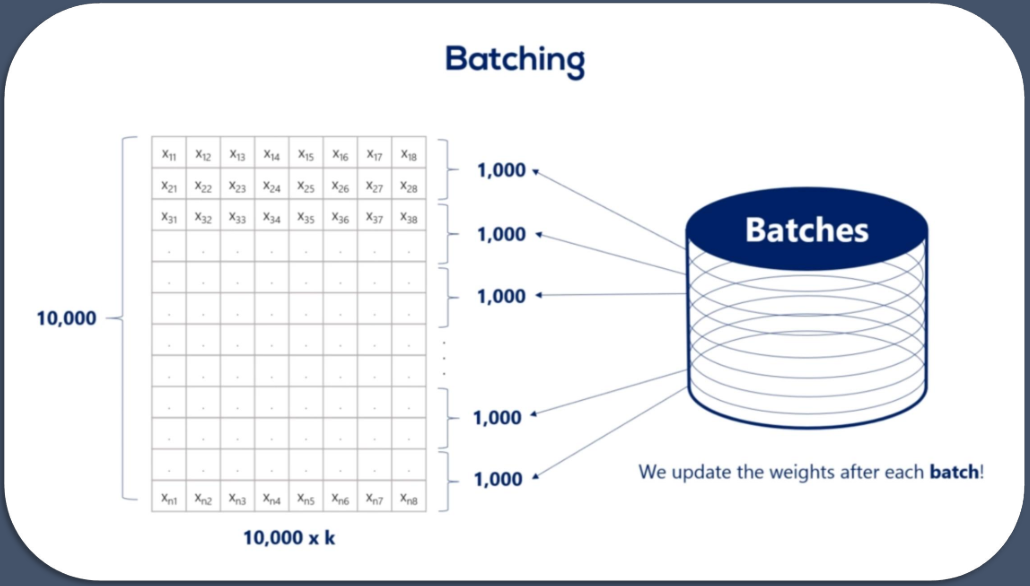

In [16]:
BATCH_SIZE = 100

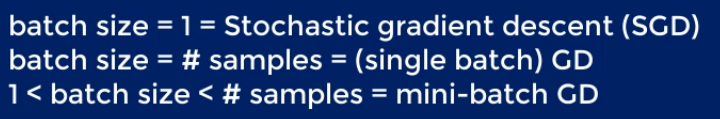

In [17]:
train_data = train_data.batch(BATCH_SIZE)

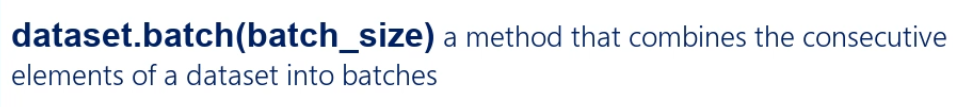

In [18]:
validation_data = validation_data.batch(num_validation_samples)

In [19]:
test_data = test_data.batch(num_test_samples)

In [20]:
#validation dataset should have the same shape and format as train dataset
validation_inputs, validation_targets = next(iter(validation_data))

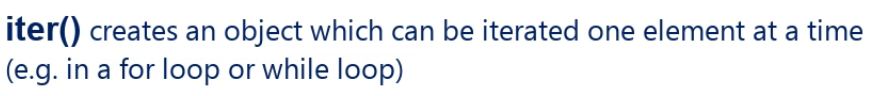




The Python `iter()` function returns an iterator for the given object.


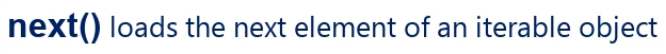

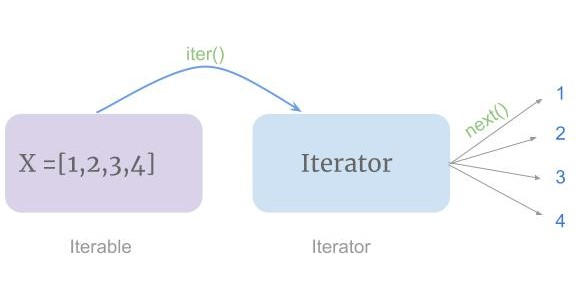

## Outlining the Model

In [21]:
input_size = 784
output_size = 10

hidden_layer_size = 50
    
model = tf.keras.Sequential([
       
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), 
    
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    
    tf.keras.layers.Dense(output_size, activation='softmax')
])

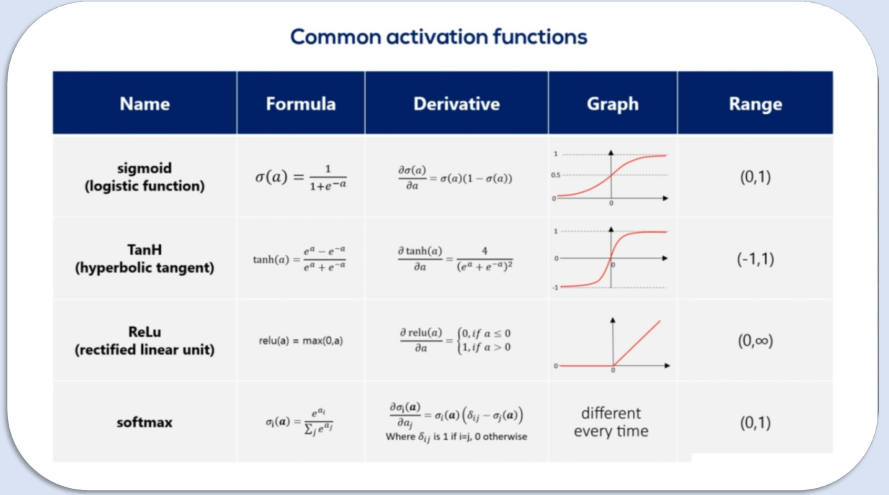

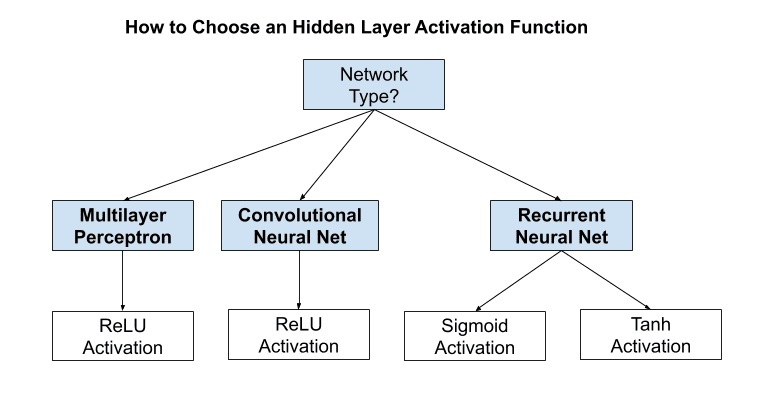

### Choose the optimizer and the loss function

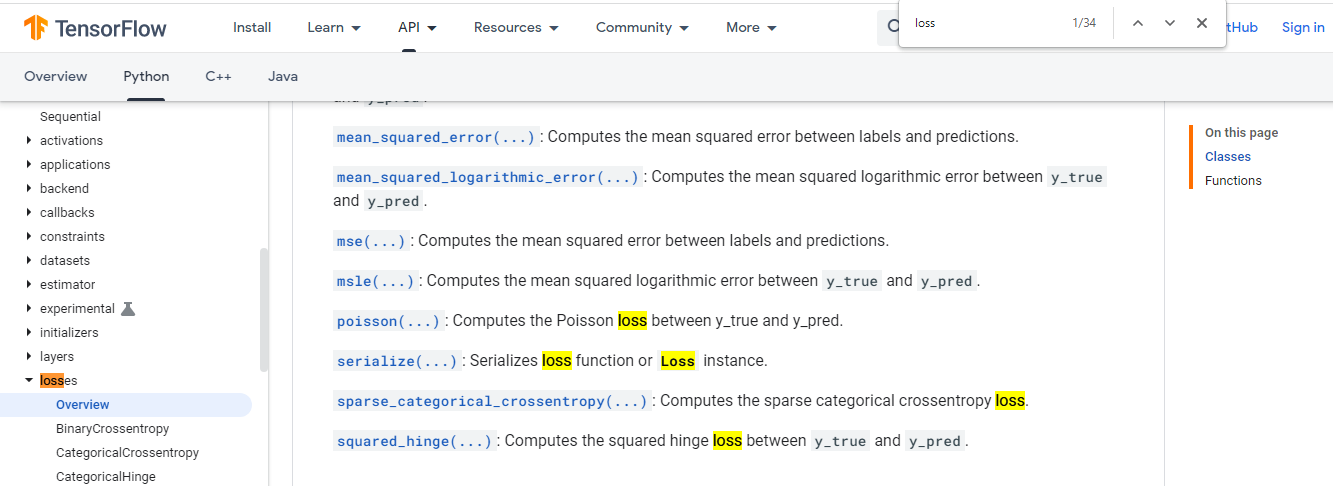

Go to the following address and take a look at different methods and functions that we need here

https://www.tensorflow.org/api_docs/python/tf/keras/losses

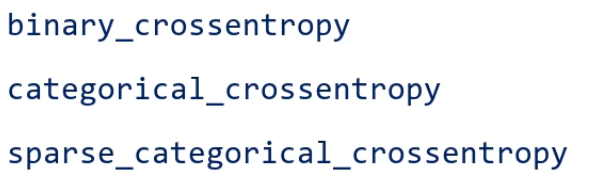

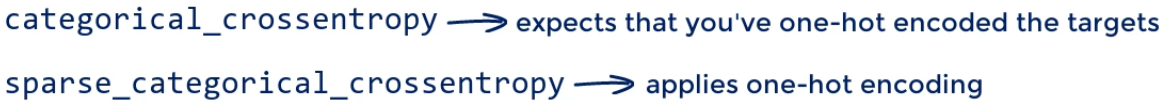

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training


In [23]:
NUM_EPOCHS = 5

model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose =2)

Epoch 1/5
540/540 - 10s - loss: 0.4099 - accuracy: 0.8841 - val_loss: 0.2022 - val_accuracy: 0.9432
Epoch 2/5
540/540 - 7s - loss: 0.1774 - accuracy: 0.9488 - val_loss: 0.1530 - val_accuracy: 0.9550
Epoch 3/5
540/540 - 8s - loss: 0.1338 - accuracy: 0.9610 - val_loss: 0.1242 - val_accuracy: 0.9640
Epoch 4/5
540/540 - 8s - loss: 0.1112 - accuracy: 0.9678 - val_loss: 0.1160 - val_accuracy: 0.9662
Epoch 5/5
540/540 - 8s - loss: 0.0943 - accuracy: 0.9723 - val_loss: 0.0949 - val_accuracy: 0.9725


## Test the model

As we discussed in the lectures, after training on the training data and validating on the validation data, we test the final prediction power of our model by running it on the test dataset that the algorithm has NEVER seen before.

It is very important to realize that fiddling with the hyperparameters overfits the validation dataset. 

The test is the absolute final instance. You should not test before you are completely done with adjusting your model.

If you adjust your model after testing, you will start overfitting the test dataset, which will defeat its purpose.

In [24]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 0s 18ms/step - loss: 0.1043 - accuracy: 0.9696


In [25]:
print('Test loss of our model is: {0:.3f}. And our Test accuracy is: {1:.3f}%'.format(test_loss, test_accuracy*100.))

Test loss of our model is: 0.104. And our Test accuracy is: 96.960%


Using the initial model and hyperparameters given in this notebook, the final test accuracy should be roughly around 97%.

Each time the code is rerun, we get a different accuracy as the batches are shuffled, the weights are initialized in a different way, etc.

Finally, we have intentionally reached a suboptimal solution, so you can have space to build on it.